In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
import datetime

In [2]:
df = pd.read_excel('KPMG2.xlsx')

In [3]:
df.head()

,Age,Profit,Approved orders,own_car,DOB,Number of Records,Address,Brand,Country,customer id (CustomerAddress),...,Product Id,Product Line,Product Size,Property Valuation,Standard Cost,State,Tenure,Transaction Date,Transaction Id,Wealth Segment
0,44.0,64.93,1,0,8/17/1976,1,6915 Nobel Crossing,Giant Bicycles,Australia,3123,...,2,Road,small,6,525.33,NSW,20.0,12/30/2017,253,High Net Worth
1,30.0,179.44,1,0,2/19/1990,1,45 Talisman Pass,Solex,Australia,3355,...,62,Standard,medium,4,298.72,QLD,3.0,12/30/2017,411,Mass Customer
2,42.0,409.86,1,1,9/12/1978,1,48023 International Way,Solex,Australia,1854,...,62,Standard,medium,1,614.80,VIC,17.0,12/30/2017,497,High Net Worth
3,35.0,198.29,1,1,10/31/1985,1,12574 Truax Alley,Trek Bicycles,Australia,2878,...,70,Standard,medium,6,297.43,NSW,9.0,12/30/2017,606,Mass Customer
4,23.0,872.89,1,0,12/14/1997,1,6804 Red Cloud Parkway,Trek Bicycles,Australia,2865,...,80,Standard,large,9,596.55,NSW,3.0,12/30/2017,748,High Net Worth


# Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  19513 non-null  float64
 1   Profit                               19773 non-null  float64
 2   Approved orders                      19968 non-null  int64  
 3   own_car                              19968 non-null  int64  
 4   DOB                                  19522 non-null  object 
 5   Number of Records                    19968 non-null  int64  
 6   Address                              19968 non-null  object 
 7   Brand                                19773 non-null  object 
 8   Country                              19968 non-null  object 
 9   customer id (CustomerAddress)        19968 non-null  int64  
 10  customer id (CustomerDemographic)    19968 non-null  int64  
 11  Customer Id                 

In [4]:
df = df.drop(columns=['customer id (CustomerAddress)','Owns Car','customer id (CustomerDemographic)','Number of Records','DOB'])

In [5]:
pd.set_option('display.max_columns',None)
df.head()

,Age,Profit,Approved orders,own_car,Address,Brand,Country,Customer Id,Deceased Indicator,First Name,Gender,Job Industry Category,Job Title,Last Name,List Price,Online Order,Order Status,Past 3 Years Bike Related Purchases,Postcode,Product Class,Product First Sold Date,Product Id,Product Line,Product Size,Property Valuation,Standard Cost,State,Tenure,Transaction Date,Transaction Id,Wealth Segment
0,44.0,64.93,1,0,6915 Nobel Crossing,Giant Bicycles,Australia,3123,N,Tina,F,Health,Dental Hygienist,Riggulsford,590.26,0.0,Approved,71,2195,low,11/5/2010,2,Road,small,6,525.33,NSW,20.0,12/30/2017,253,High Net Worth
1,30.0,179.44,1,0,45 Talisman Pass,Solex,Australia,3355,N,Cherin,F,Manufacturing,Staff Accountant I,Thireau,478.16,0.0,Approved,50,4102,medium,6/23/1993,62,Standard,medium,4,298.72,QLD,3.0,12/30/2017,411,Mass Customer
2,42.0,409.86,1,1,48023 International Way,Solex,Australia,1854,N,Mandie,F,NaN,Community Outreach Specialist,Jeger,1024.66,1.0,Approved,11,3630,high,10/2/1993,62,Standard,medium,1,614.80,VIC,17.0,12/30/2017,497,High Net Worth
3,35.0,198.29,1,1,12574 Truax Alley,Trek Bicycles,Australia,2878,N,Sauveur,M,Property,Analog Circuit Design manager,Skeel,495.72,0.0,Approved,73,2316,high,7/26/1999,70,Standard,medium,6,297.43,NSW,9.0,12/30/2017,606,Mass Customer
4,23.0,872.89,1,0,6804 Red Cloud Parkway,Trek Bicycles,Australia,2865,N,Lila,F,Manufacturing,Electrical Engineer,Eyeington,1469.44,1.0,Approved,11,2099,medium,5/18/2012,80,Standard,large,9,596.55,NSW,3.0,12/30/2017,748,High Net Worth


In [6]:
df.shape

(19968, 31)

In [9]:
df = df.rename(columns={'Job Industry Category':'category',
                        'Past 3 Years Bike Related Purchases':'past_3_yr_purchase',
                        'Product First Sold Date':'1st_sold_date',
                        'Transaction Date':'tran_date',
                        'Transaction Id':'tran_id',
                        'Customer Id':'customer_id'}
               )

In [10]:
#yearmonth of sold date
df['month_year'] = pd.to_datetime(df['1st_sold_date']).dt.to_period('M')
df.head()

,Age,Profit,Approved orders,own_car,Address,Brand,Country,customer_id,Deceased Indicator,First Name,Gender,category,Job Title,Last Name,List Price,Online Order,Order Status,past_3_yr_purchase,Postcode,Product Class,1st_sold_date,Product Id,Product Line,Product Size,Property Valuation,Standard Cost,State,Tenure,tran_date,tran_id,Wealth Segment,month_year
0,44.0,64.93,1,0,6915 Nobel Crossing,Giant Bicycles,Australia,3123,N,Tina,F,Health,Dental Hygienist,Riggulsford,590.26,0.0,Approved,71,2195,low,11/5/2010,2,Road,small,6,525.33,NSW,20.0,12/30/2017,253,High Net Worth,2010-11
1,30.0,179.44,1,0,45 Talisman Pass,Solex,Australia,3355,N,Cherin,F,Manufacturing,Staff Accountant I,Thireau,478.16,0.0,Approved,50,4102,medium,6/23/1993,62,Standard,medium,4,298.72,QLD,3.0,12/30/2017,411,Mass Customer,1993-06
2,42.0,409.86,1,1,48023 International Way,Solex,Australia,1854,N,Mandie,F,NaN,Community Outreach Specialist,Jeger,1024.66,1.0,Approved,11,3630,high,10/2/1993,62,Standard,medium,1,614.80,VIC,17.0,12/30/2017,497,High Net Worth,1993-10
3,35.0,198.29,1,1,12574 Truax Alley,Trek Bicycles,Australia,2878,N,Sauveur,M,Property,Analog Circuit Design manager,Skeel,495.72,0.0,Approved,73,2316,high,7/26/1999,70,Standard,medium,6,297.43,NSW,9.0,12/30/2017,606,Mass Customer,1999-07
4,23.0,872.89,1,0,6804 Red Cloud Parkway,Trek Bicycles,Australia,2865,N,Lila,F,Manufacturing,Electrical Engineer,Eyeington,1469.44,1.0,Approved,11,2099,medium,5/18/2012,80,Standard,large,9,596.55,NSW,3.0,12/30/2017,748,High Net Worth,2012-05


In [11]:
# change the order of the columns
df= df[['customer_id','First Name','Last Name','Age','Gender','Job Title','own_car','Deceased Indicator',
      'Tenure','Property Valuation','category','Wealth Segment','Country','Address','Postcode','State',
      'Brand','Online Order','Order Status','tran_date','tran_id','past_3_yr_purchase',
       'Product Class','Product Id','Product Line',
      'Product Size','List Price','Standard Cost','Profit','1st_sold_date','month_year']]

In [12]:
df.head()

,customer_id,First Name,Last Name,Age,Gender,Job Title,own_car,Deceased Indicator,Tenure,Property Valuation,category,Wealth Segment,Country,Address,Postcode,State,Brand,Online Order,Order Status,tran_date,tran_id,past_3_yr_purchase,Product Class,Product Id,Product Line,Product Size,List Price,Standard Cost,Profit,1st_sold_date,month_year
0,3123,Tina,Riggulsford,44.0,F,Dental Hygienist,0,N,20.0,6,Health,High Net Worth,Australia,6915 Nobel Crossing,2195,NSW,Giant Bicycles,0.0,Approved,12/30/2017,253,71,low,2,Road,small,590.26,525.33,64.93,11/5/2010,2010-11
1,3355,Cherin,Thireau,30.0,F,Staff Accountant I,0,N,3.0,4,Manufacturing,Mass Customer,Australia,45 Talisman Pass,4102,QLD,Solex,0.0,Approved,12/30/2017,411,50,medium,62,Standard,medium,478.16,298.72,179.44,6/23/1993,1993-06
2,1854,Mandie,Jeger,42.0,F,Community Outreach Specialist,1,N,17.0,1,NaN,High Net Worth,Australia,48023 International Way,3630,VIC,Solex,1.0,Approved,12/30/2017,497,11,high,62,Standard,medium,1024.66,614.80,409.86,10/2/1993,1993-10
3,2878,Sauveur,Skeel,35.0,M,Analog Circuit Design manager,1,N,9.0,6,Property,Mass Customer,Australia,12574 Truax Alley,2316,NSW,Trek Bicycles,0.0,Approved,12/30/2017,606,73,high,70,Standard,medium,495.72,297.43,198.29,7/26/1999,1999-07
4,2865,Lila,Eyeington,23.0,F,Electrical Engineer,0,N,3.0,9,Manufacturing,High Net Worth,Australia,6804 Red Cloud Parkway,2099,NSW,Trek Bicycles,1.0,Approved,12/30/2017,748,11,medium,80,Standard,large,1469.44,596.55,872.89,5/18/2012,2012-05


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   customer_id         19968 non-null  int64    
 1   First Name          19968 non-null  object   
 2   Last Name           19326 non-null  object   
 3   Age                 19513 non-null  float64  
 4   Gender              19968 non-null  object   
 5   Job Title           17589 non-null  object   
 6   own_car             19968 non-null  int64    
 7   Deceased Indicator  19968 non-null  object   
 8   Tenure              19522 non-null  float64  
 9   Property Valuation  19968 non-null  int64    
 10  category            16746 non-null  object   
 11  Wealth Segment      19968 non-null  object   
 12  Country             19968 non-null  object   
 13  Address             19968 non-null  object   
 14  Postcode            19968 non-null  int64    
 15  State              

In [14]:
df.isna().sum()

customer_id              0
First Name               0
Last Name              642
Age                    455
Gender                   0
Job Title             2379
own_car                  0
Deceased Indicator       0
Tenure                 446
Property Valuation       0
category              3222
Wealth Segment           0
Country                  0
Address                  0
Postcode                 0
State                    0
Brand                  195
Online Order           359
Order Status             0
tran_date                0
tran_id                  0
past_3_yr_purchase       0
Product Class          195
Product Id               0
Product Line           195
Product Size           195
List Price               0
Standard Cost          195
Profit                 195
1st_sold_date          195
month_year             195
dtype: int64

In [15]:
df = df.dropna()

In [16]:
df.shape

(13628, 31)

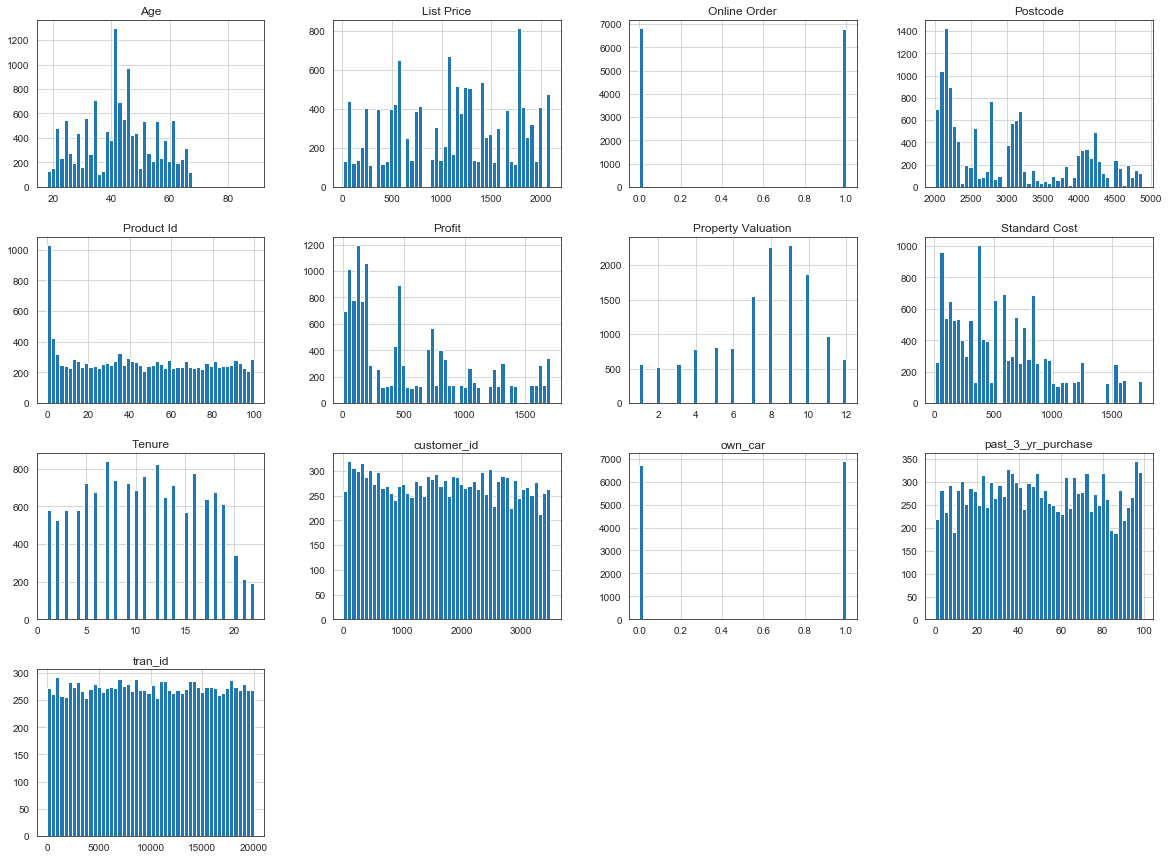

In [53]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [18]:
cor = df.corr()
cor

,customer_id,Age,own_car,Tenure,Property Valuation,Postcode,Online Order,tran_id,past_3_yr_purchase,Product Id,List Price,Standard Cost,Profit
customer_id,1.000000,-0.015771,0.037449,-0.016108,0.004266,0.033176,0.002261,-0.000546,0.001786,0.004986,0.021191,0.013377,0.014003
Age,-0.015771,1.000000,0.014638,0.431174,0.004452,-0.006783,-0.007803,-0.002020,-0.049271,-0.011700,-0.002394,0.000804,-0.003497
own_car,0.037449,0.014638,1.000000,0.007150,0.040532,-0.011913,0.004561,-0.004913,0.012070,-0.043752,0.019550,0.010218,0.014674
Tenure,-0.016108,0.431174,0.007150,1.000000,-0.028586,0.012697,0.010767,0.002346,-0.027232,-0.013513,0.001344,-0.014015,0.013182
Property Valuation,0.004266,0.004452,0.040532,-0.028586,1.000000,-0.521838,0.000224,-0.008357,0.013354,-0.002231,-0.007945,-0.003438,-0.006554
Postcode,0.033176,-0.006783,-0.011913,0.012697,-0.521838,1.000000,0.000785,0.009445,-0.019291,0.012959,0.009816,0.007130,0.005715
Online Order,0.002261,-0.007803,0.004561,0.010767,0.000224,0.000785,1.000000,0.006554,0.000631,-0.002406,-0.007193,0.004880,-0.012545
tran_id,-0.000546,-0.002020,-0.004913,0.002346,-0.008357,0.009445,0.006554,1.000000,-0.000857,-0.006936,-0.001017,-0.002793,0.001108
past_3_yr_purchase,0.001786,-0.049271,0.012070,-0.027232,0.013354,-0.019291,0.000631,-0.000857,1.000000,-0.003995,0.006550,-0.004707,0.011642
Product Id,0.004986,-0.011700,-0.043752,-0.013513,-0.002231,0.012959,-0.002406,-0.006936,-0.003995,1.000000,0.082837,0.028614,0.074320


Explore correlation between the continuous feature variables.

(10, 0)

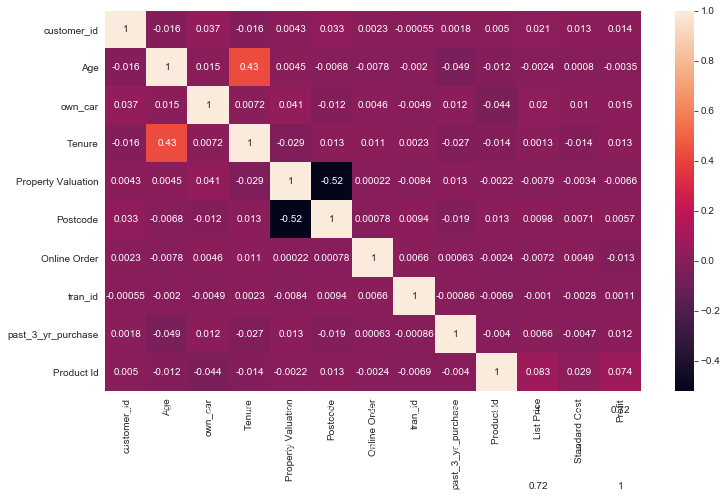

In [19]:
plt.figure(figsize=(12,7))
ax = sns.heatmap(cor,annot=True)
#fix the size problem
plt.ylim(10, 0)

In [21]:
df['1st_sold_date'] = pd.to_datetime(df['1st_sold_date'])

In [24]:
df.head()

,customer_id,First Name,Last Name,Age,Gender,Job Title,own_car,Deceased Indicator,Tenure,Property Valuation,category,Wealth Segment,Country,Address,Postcode,State,Brand,Online Order,Order Status,tran_date,tran_id,past_3_yr_purchase,Product Class,Product Id,Product Line,Product Size,List Price,Standard Cost,Profit,1st_sold_date,month_year
0,3123,Tina,Riggulsford,44.0,F,Dental Hygienist,0,N,20.0,6,Health,High Net Worth,Australia,6915 Nobel Crossing,2195,NSW,Giant Bicycles,0.0,Approved,12/30/2017,253,71,low,2,Road,small,590.26,525.33,64.93,2010-11-05,2010-11
1,3355,Cherin,Thireau,30.0,F,Staff Accountant I,0,N,3.0,4,Manufacturing,Mass Customer,Australia,45 Talisman Pass,4102,QLD,Solex,0.0,Approved,12/30/2017,411,50,medium,62,Standard,medium,478.16,298.72,179.44,1993-06-23,1993-06
3,2878,Sauveur,Skeel,35.0,M,Analog Circuit Design manager,1,N,9.0,6,Property,Mass Customer,Australia,12574 Truax Alley,2316,NSW,Trek Bicycles,0.0,Approved,12/30/2017,606,73,high,70,Standard,medium,495.72,297.43,198.29,1999-07-26,1999-07
4,2865,Lila,Eyeington,23.0,F,Electrical Engineer,0,N,3.0,9,Manufacturing,High Net Worth,Australia,6804 Red Cloud Parkway,2099,NSW,Trek Bicycles,1.0,Approved,12/30/2017,748,11,medium,80,Standard,large,1469.44,596.55,872.89,2012-05-18,2012-05
5,934,Marcellus,Louisot,24.0,M,Human Resources Manager,0,N,6.0,12,Manufacturing,Mass Customer,Australia,4 Eastlawn Crossing,2036,NSW,Trek Bicycles,0.0,Approved,12/30/2017,1033,76,medium,49,Road,medium,533.51,400.13,133.38,1997-10-04,1997-10


In [12]:
df[df['Online Order']==1.0]

,customer_id,First Name,Last Name,Age,Gender,Job Title,own_car,Deceased Indicator,Tenure,Property Valuation,...,past_3_yr_purchase,Product Class,Product Id,Product Line,Product Size,List Price,Standard Cost,Profit,1st_sold_date,month_year
4,2865,Lila,Eyeington,23.0,F,Electrical Engineer,0,N,3.0,9,...,11,medium,80,Standard,large,1469.44,596.55,872.89,2012-05-18,2012-05
6,2421,Marilee,Garbott,66.0,F,Research Nurse,1,N,13.0,8,...,54,medium,56,Standard,medium,183.86,137.90,45.96,1991-01-21,1991-01
7,675,Sharl,Wiggin,44.0,F,Administrative Assistant I,1,N,17.0,12,...,37,medium,12,Standard,medium,1231.15,161.60,1069.55,2010-05-05,2010-05
8,3216,Edgar,Ordish,22.0,M,Database Administrator III,1,N,1.0,7,...,59,medium,95,Standard,large,569.56,528.43,41.13,2016-03-29,2016-03
17,2713,Hadlee,Mackro,66.0,M,Statistician II,1,N,5.0,11,...,55,medium,25,Road,medium,1538.99,829.65,709.34,1993-05-26,1993-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19950,1658,Selina,Clow,27.0,F,Sales Representative,1,N,5.0,7,...,17,medium,18,Standard,medium,575.27,431.45,143.82,2009-03-08,2009-03
19954,1022,Suzann,Wilks,30.0,F,Assistant Manager,1,N,14.0,10,...,56,medium,3,Standard,large,2091.47,388.92,1702.55,1999-07-26,1999-07
19958,2160,Kettie,Cantopher,49.0,F,Recruiter,1,N,15.0,8,...,64,medium,43,Standard,medium,1151.96,649.49,502.47,2012-04-10,2012-04
19962,1852,Darby,Shailer,42.0,F,Research Associate,0,N,18.0,6,...,22,medium,63,Standard,medium,1483.20,99.59,1383.61,1998-12-17,1998-12


In [25]:
# drop customers who are deceased,
# first get the index, then drop
deceased = df[df['Deceased Indicator']=='Y'].index
deceased

Int64Index([885, 3169, 4808, 5401, 5995, 9289, 10482, 11130], dtype='int64')

In [26]:
df.drop(deceased,inplace=True)

In [27]:
# check the result
df[df['Deceased Indicator']=='Y']

,customer_id,First Name,Last Name,Age,Gender,Job Title,own_car,Deceased Indicator,Tenure,Property Valuation,category,Wealth Segment,Country,Address,Postcode,State,Brand,Online Order,Order Status,tran_date,tran_id,past_3_yr_purchase,Product Class,Product Id,Product Line,Product Size,List Price,Standard Cost,Profit,1st_sold_date,month_year


In [28]:
# final data
df.shape

(13620, 31)

# RFM analysis

## Recency (R) 

**Recency is the most important predictor of who is more likely to respond to an offer. Customers who have purchased recently are more likely to purchase again when compared to those who did not purchase recently.**

In [30]:
#To tag the customers on the basis of recency flag, first take distinct dates of customer purchase.
sold_df = df[['customer_id','tran_date']].drop_duplicates()
sold_df

,customer_id,tran_date
0,3123,12/30/2017
1,3355,12/30/2017
3,2878,12/30/2017
4,2865,12/30/2017
5,934,12/30/2017
...,...,...
19958,2160,1/1/2017
19961,642,1/1/2017
19962,1852,1/1/2017
19963,2011,1/1/2017


In [57]:
# check the latest transaction date of this dataset
# sold_df['tran_date'].max()

Timestamp('2017-12-30 00:00:00')

In [31]:
sold_df['tran_date'][0]
#type(sold_df['tran_date'][0])

'12/30/2017'

In [32]:
import datetime as dt

In [33]:
# convert date format
sold_df['tran_date'] = pd.to_datetime(df['tran_date']).dt.strftime('%Y%m%d')
sold_df['tran_date']

0        20171230
1        20171230
3        20171230
4        20171230
5        20171230
           ...   
19958    20170101
19961    20170101
19962    20170101
19963    20170101
19964    20170101
Name: tran_date, Length: 13536, dtype: object

In [34]:
pd.to_numeric(sold_df['tran_date'],errors='coerce')

0        20171230
1        20171230
3        20171230
4        20171230
5        20171230
           ...   
19958    20170101
19961    20170101
19962    20170101
19963    20170101
19964    20170101
Name: tran_date, Length: 13536, dtype: int64

In [35]:
sold_df['tran_date'] > '20171101'

0         True
1         True
3         True
4         True
5         True
         ...  
19958    False
19961    False
19962    False
19963    False
19964    False
Name: tran_date, Length: 13536, dtype: bool

**Algorithm:  
Tag a customer from 1 to 5 in steps of 2 months, i.e. 5 if customer bought in last 2 months; else 4 if made a purchase in last 4 months and so on. Finally for a customer, maximum of the recency flag is taken as final recency flag.**

In [36]:
# define the recency function
def recency(row):
    if row['tran_date'] > '20171101':
        val = 5
    elif row['tran_date'] <= '20171101' and row['tran_date'] > '20170901':
        val = 4
    elif row['tran_date'] <= '20170901' and row['tran_date'] > '20170701':
        val = 3
    elif row['tran_date'] <= '20170701' and row['tran_date'] > '20170501':
        val = 2
    else:
        val = 1
    return val

# create the recency column
sold_df['Recency_Flag'] = sold_df.apply(recency, axis=1)

In [37]:
sold_df['Recency_Flag']

0        5
1        5
3        5
4        5
5        5
        ..
19958    1
19961    1
19962    1
19963    1
19964    1
Name: Recency_Flag, Length: 13536, dtype: int64

In [38]:
# For a customer, take the maximum recency flag as final recency flag
sold_df = sold_df.groupby('customer_id',as_index=False)['Recency_Flag'].max()

In [39]:
sold_df

,customer_id,Recency_Flag
0,1,5
1,2,3
2,9,4
3,12,4
4,13,5
...,...,...
2440,3493,4
2441,3494,5
2442,3495,5
2443,3496,1


In [40]:
sold_df.Recency_Flag.value_counts()

5    1467
4     603
3     239
2      94
1      42
Name: Recency_Flag, dtype: int64

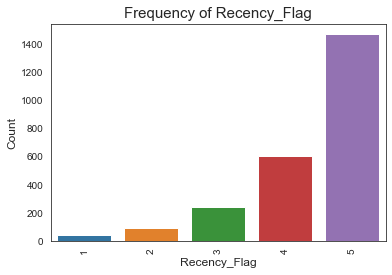

In [77]:
# visualize the distribution of recency
sns.countplot(x='Recency_Flag',data=sold_df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Recency_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Recency_Flag', fontsize=15)
plt.show()

It can be seen that more than half of the customers made a purchase in the last 2 month. Note that some customers have not visited the website in last 4-8 months.To regain that lost customer base, business should look out for the reasons why these customers stop visiting the stores.

## Frequency (F)

**The second most important factor is how frequently these customers purchase. The higher the frequency, the higher is the chances of these responding to the offers.**

**Algorithm:**  
To tag the customers on the basis of frequency flag, first count the transaction_id for each customer, then tran_id count will be split into 5 equal parts to rank the customers on a scale of 1 to 5 where 5 being the most frequent.

In [41]:
freq = df[['tran_id','customer_id']].drop_duplicates()
freq

,tran_id,customer_id
0,253,3123
1,411,3355
3,606,2878
4,748,2865
5,1033,934
...,...,...
19959,16575,1745
19961,17839,642
19962,17907,1852
19963,18436,2011


In [42]:
#Calculating the count of unique purchase for each customer
freq_count = freq.groupby(['customer_id'])['tran_id'].aggregate('count').reset_index()
freq_count 

,customer_id,tran_id
0,1,11
1,2,3
2,9,6
3,12,7
4,13,7
...,...,...
2440,3493,6
2441,3494,4
2442,3495,7
2443,3496,4


In [28]:
# check result for one customer
freq[freq['customer_id']==1]

,tran_id,customer_id
371,94,1
939,14931,1
1214,16423,1
11508,15663,1
12348,13644,1
12775,5157,1
14677,3765,1
15137,18970,1
15224,14486,1
17098,13424,1


In [43]:
# rearrange the result
freq_count = freq_count.sort_values(by=['tran_id'],ascending=False) 
freq_count 

,customer_id,tran_id
1547,2183,14
1754,2476,14
1464,2072,13
1747,2464,13
2331,3326,13
...,...,...
1094,1544,1
317,431,1
2312,3292,1
1361,1920,1


In [44]:
# create the unique count df
unique_tranCnt = freq_count[['tran_id']].drop_duplicates()
unique_tranCnt

,tran_id
1547,14
1464,13
781,12
2028,11
2378,10
1920,9
905,8
2414,7
1739,6
490,5


In [45]:
# Dividing into 3 equal parts
unique_tranCnt['Freqency_Band'] = pd.qcut(unique_tranCnt['tran_id'], 5)
unique_tranCnt=unique_tranCnt[['Freqency_Band']].drop_duplicates()
unique_tranCnt

,Freqency_Band
1547,"(11.4, 14.0]"
2028,"(8.8, 11.4]"
905,"(6.2, 8.8]"
1739,"(3.6, 6.2]"
786,"(0.999, 3.6]"


Tagging customers in the range of 1 to 5 based on the count of their unique invoice where 5 corresponds to those customers who visit the store most often:

In [32]:
# define the frequency function
def frequency(row):
    if row['tran_id'] <=4:
        val = 1
    elif row['tran_id'] >4 and row['tran_id'] <=6:
        val = 2
    elif row['tran_id'] >6 and row['tran_id'] <=9:
        val = 3
    elif row['tran_id'] >9 and row['tran_id'] <=11:
        val = 4
    else:
        val = 5
    return val

freq_count['Freq_Flag'] = freq_count.apply(frequency,axis=1)

In [33]:
freq_count.Freq_Flag.value_counts()

1    842
2    833
3    644
4    102
5     24
Name: Freq_Flag, dtype: int64

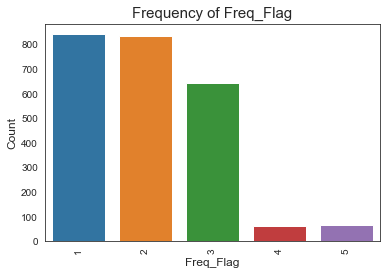

In [141]:
# visualize the distribution of frequency
sns.countplot(x='Freq_Flag',data=freq_count)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Freq_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Freq_Flag', fontsize=15)
plt.show()

It can be seen most of the customers purchased less than 11 times.

## Monetary Value (M): 

**The third factor is the amount of money these customers have spent on purchases. Customers who have spent higher contribute more value to the business as compared to those who have spent less.**

To tag the customers on the basis of monetary flag, first get the Total price for each customer and then 

In [34]:
#Calculating the Sum of total monetary purchase for each customer
monetary = df.groupby(['customer_id'])['List Price'].aggregate('sum').reset_index()
monetary

,customer_id,List Price
0,1,9084.45
1,2,4149.07
2,9,5357.55
3,12,6394.21
4,13,7734.74
...,...,...
2440,3493,10053.82
2441,3494,5122.71
2442,3495,8626.65
2443,3496,4725.38


In [41]:
# reorder the result
monetary = monetary.sort_values(by='List Price',ascending=False)
monetary

,customer_id,List Price
1547,2183,19071.32
671,941,17898.46
1972,2788,17258.94
920,1302,17035.83
1134,1597,16245.23
...,...,...
850,1204,235.63
1722,2423,202.62
2245,3189,200.70
1606,2274,142.98


In [152]:
# check if any negative price exists
monetary[monetary['List Price']<0]

,customer_id,List Price


In [35]:
# didvide total price to 5 parts
unique_price = monetary[['List Price']].drop_duplicates()
unique_price['monteray_band'] = pd.qcut(unique_price['List Price'],5)
unique_price = unique_price[['monteray_band']].drop_duplicates()
unique_price

,monteray_band
0,"(8547.34, 19071.32]"
1,"(3703.87, 5178.17]"
2,"(5178.17, 6607.77]"
4,"(6607.77, 8547.34]"
5,"(60.339000000000006, 3703.87]"


**Algorithm:**  
Tagging customers in the range of 1 to 5 based on their Total price value, where 5 corresponds the customers having highest monetary value:

In [36]:
# define the monetary function
def mo(row):
    if row['List Price'] <=3703:
        val = 1
    elif row['List Price'] >3703 and row['List Price'] <=5187:
        val = 2
    elif row['List Price'] >5187 and row['List Price'] <=6607:
        val = 3
    elif row['List Price'] >6607 and row['List Price'] <=8547:
        val = 4
    else:
        val = 5
    return val

monetary['Mon_Flag'] = monetary.apply(mo,axis=1)

In [37]:
monetary['Mon_Flag'].value_counts()

1    495
2    491
5    488
4    487
3    484
Name: Mon_Flag, dtype: int64

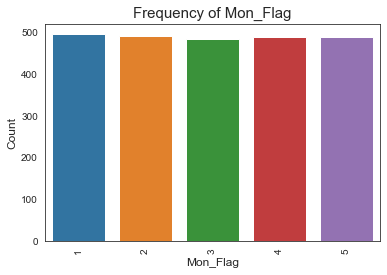

In [167]:
# visualize the monetary distribution
sns.countplot(x='Mon_Flag',data=monetary)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Mon_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Mon_Flag', fontsize=15)
plt.show()

There is an almost equal distribution of customers as far as monetary value is concerned.

Combine all the three flags from dataframe of: sold_df, freq_count, and monetary

In [38]:
rmf_df = pd.merge(sold_df,freq_count[['customer_id','Freq_Flag']],on=['customer_id'], how='left')

In [39]:
rmf_df = pd.merge(rmf_df,monetary[['customer_id','Mon_Flag']],on=['customer_id'], how='left')

In [40]:
rmf_df

,customer_id,Recency_Flag,Freq_Flag,Mon_Flag
0,1,5,4,5
1,2,3,1,2
2,9,4,2,3
3,12,4,3,3
4,13,5,3,4
...,...,...,...,...
2440,3493,4,2,5
2441,3494,5,1,2
2442,3495,5,3,5
2443,3496,1,1,2


Get the combined RFM score for each customer:

In [62]:
rmf_df[['Recency_Flag','Freq_Flag','Mon_Flag']] = rmf_df[['Recency_Flag','Freq_Flag','Mon_Flag']].astype(str)

In [65]:
rmf_df['RMF_score'] = rmf_df[['Recency_Flag','Freq_Flag','Mon_Flag']].apply(lambda x: ''.join(x),axis=1)

In [66]:
rmf_df 

,customer_id,Recency_Flag,Freq_Flag,Mon_Flag,RMF_score
0,1,5,4,5,545
1,2,3,1,2,312
2,9,4,2,3,423
3,12,4,3,3,433
4,13,5,3,4,534
...,...,...,...,...,...
2440,3493,4,2,5,425
2441,3494,5,1,2,512
2442,3495,5,3,5,535
2443,3496,1,1,2,112


In [68]:
rmf_df['RMF_score'].value_counts()

535    233
523    189
534    175
511    171
522    142
      ... 
221      1
113      1
332      1
233      1
123      1
Name: RMF_score, Length: 62, dtype: int64

In [69]:
# export to csv file
rmf_df.to_csv('rmf.csv',index=False)

## Note:  
### Exploratory Data Analysis and further model deployment and visualization perfomed  in Tableau